In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import xarray as xr
import load_in_beam
import FSDutil

# Use seasborn for nicer looking inline plots if available 
#import seaborn as sns
#sns.set(context='notebook', style='darkgrid')
#st = axes_style("whitegrid")


In [2]:
ATL07file='processed_ATL07-01_20181121010613_08160101_001_01.h5'
# ATL07file='processed_ATL07-01_20181206115828_10520101_001_01.h5'
localFilePath='/home/jovyan/Data/'+ATL07file

ds1r = load_in_beam.read_beam(filename=localFilePath,beam='gt1r')

/home/jovyan/Data/processed_ATL07-01_20181121010613_08160101_001_01.h5


In [3]:
namer = ['gt1r','gt2r'] # 
# weak beams are 'gt1l', 'gt2l', 'gt3l'
# 'gt3r' is missing a field

CLD = []
LWD = []

for beam_ind in range(len(namer)):

    beam_data = load_in_beam.read_beam(filename=localFilePath,beam=namer[beam_ind]);
    newCLD = FSDutil.get_CLD(beam_data)
    newLWD = FSDutil.get_LWD(beam_data)
    
    CLD = np.concatenate([CLD,newCLD])
    LWD = np.concatenate([LWD,newLWD])
    

/home/jovyan/Data/processed_ATL07-01_20181121010613_08160101_001_01.h5
746
608
/home/jovyan/Data/processed_ATL07-01_20181121010613_08160101_001_01.h5
483
426


Text(0, 0.5, 'Number')

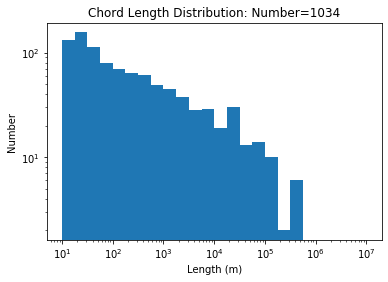

In [4]:

xbuckets = np.logspace(1, 7, num=25, endpoint=True, base=10.0, dtype=None)
hist,edges = np.histogram(CLD,xbuckets)

plt.hist(CLD,bins=edges)
plt.yscale('log')
plt.xscale('log')
plt.title('Chord Length Distribution: Number=' + str(len(CLD)))
plt.xlabel('Length (m)')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

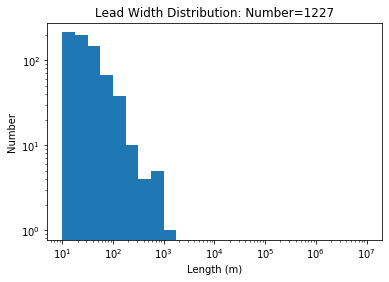

In [5]:
plt.hist(LWD,bins=edges)
plt.yscale('log')
plt.xscale('log')
plt.title('Lead Width Distribution: Number=' + str(len(LWD)))
plt.xlabel('Length (m)')
plt.ylabel('Number')